<a href="https://colab.research.google.com/github/TessRedie/Project_image_classification/blob/master/project_image_classification_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project  : Image Classification with the help of Deep Learning Algorithm

### References:

1. [Sleep stage classification from polysomnography (PSG) data](https://mne.tools/dev/auto_tutorials/clinical/60_sleep.html)

In [8]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
# TensorFlow and tf.kerasimport tensorflow as tf

import PIL.Image as Image
import keras
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image as img
from tensorflow.keras.utils import plot_model

from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

print(tf.__version__)

2.8.0


### Data uploading from Github

In [12]:
from google.colab import files
uploaded = files.upload()

Saving images_dogs.zip to images_dogs.zip


In [13]:
from zipfile import ZipFile
file_name =  "/content/images_dogs.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


[How to upload folders to Google Colab?](https://stackoverflow.com/questions/56449262/how-to-upload-folders-to-google-colab)

In [14]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory( "/content/images_dogs",
                                           validation_split=0.2,
                                           subset="training",seed=123,
                                            image_size=(img_height, img_width)
                                            ,batch_size=batch_size)

Found 2301 files belonging to 13 classes.
Using 1841 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory( "/content/images_dogs",
                                           validation_split=0.2,
                                           subset="validation",seed=123,
                                                     image_size=(img_height, img_width),
                                                     batch_size=batch_size)

Found 2301 files belonging to 13 classes.
Using 460 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['Afghan_hound', 'African_hunting_dog', 'Bedlington_terrier', 'Eskimo_dog', 'Irish_terrier', 'Japanese_spaniel', 'Lakeland_terrier', 'Mexican_hairless', 'Norwegian_elkhound', 'Yorkshire_terrier', 'borzoi', 'papillon', 'redbone']


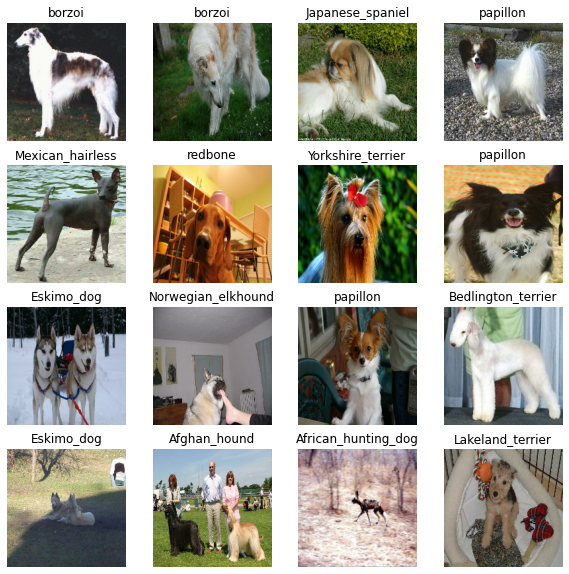

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Setting sleep manually

In [18]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
num_classes = 16

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [19]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
58/58 [==============================] - 72s 1s/step - loss: 2.7327 - accuracy: 0.1342 - val_loss: 2.3756 - val_accuracy: 0.1609
Epoch 2/10
58/58 [==============================] - 70s 1s/step - loss: 2.1945 - accuracy: 0.2607 - val_loss: 2.2072 - val_accuracy: 0.2652
Epoch 3/10
58/58 [==============================] - 72s 1s/step - loss: 1.8114 - accuracy: 0.4090 - val_loss: 2.2469 - val_accuracy: 0.2826
Epoch 4/10
58/58 [==============================] - 71s 1s/step - loss: 1.2100 - accuracy: 0.6290 - val_loss: 2.3530 - val_accuracy: 0.3130
Epoch 5/10
58/58 [==============================] - 72s 1s/step - loss: 0.5462 - accuracy: 0.8414 - val_loss: 3.0317 - val_accuracy: 0.2761
Epoch 6/10
58/58 [==============================] - 71s 1s/step - loss: 0.2061 - accuracy: 0.9506 - val_loss: 3.6329 - val_accuracy: 0.3043
Epoch 7/10
58/58 [==============================] - 72s 1s/step - loss: 0.0725 - accuracy: 0.9870 - val_loss: 3.8592 - val_accuracy: 0.2848
Epoch 8/10
58/58 [==

[VGG16 function](https://keras.io/api/applications/vgg/) 

In [33]:
from  keras.applications.vgg16 import VGG16
#model = VGG16()
model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=None,
    classifier_activation="softmax",
)

In [34]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

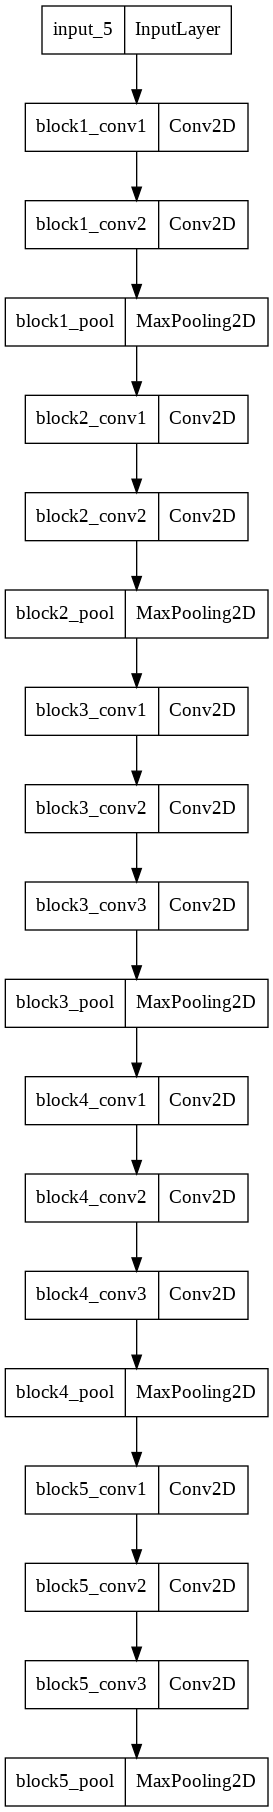

In [35]:
keras.utils.plot_model(model, "Project_Image_classification.png")

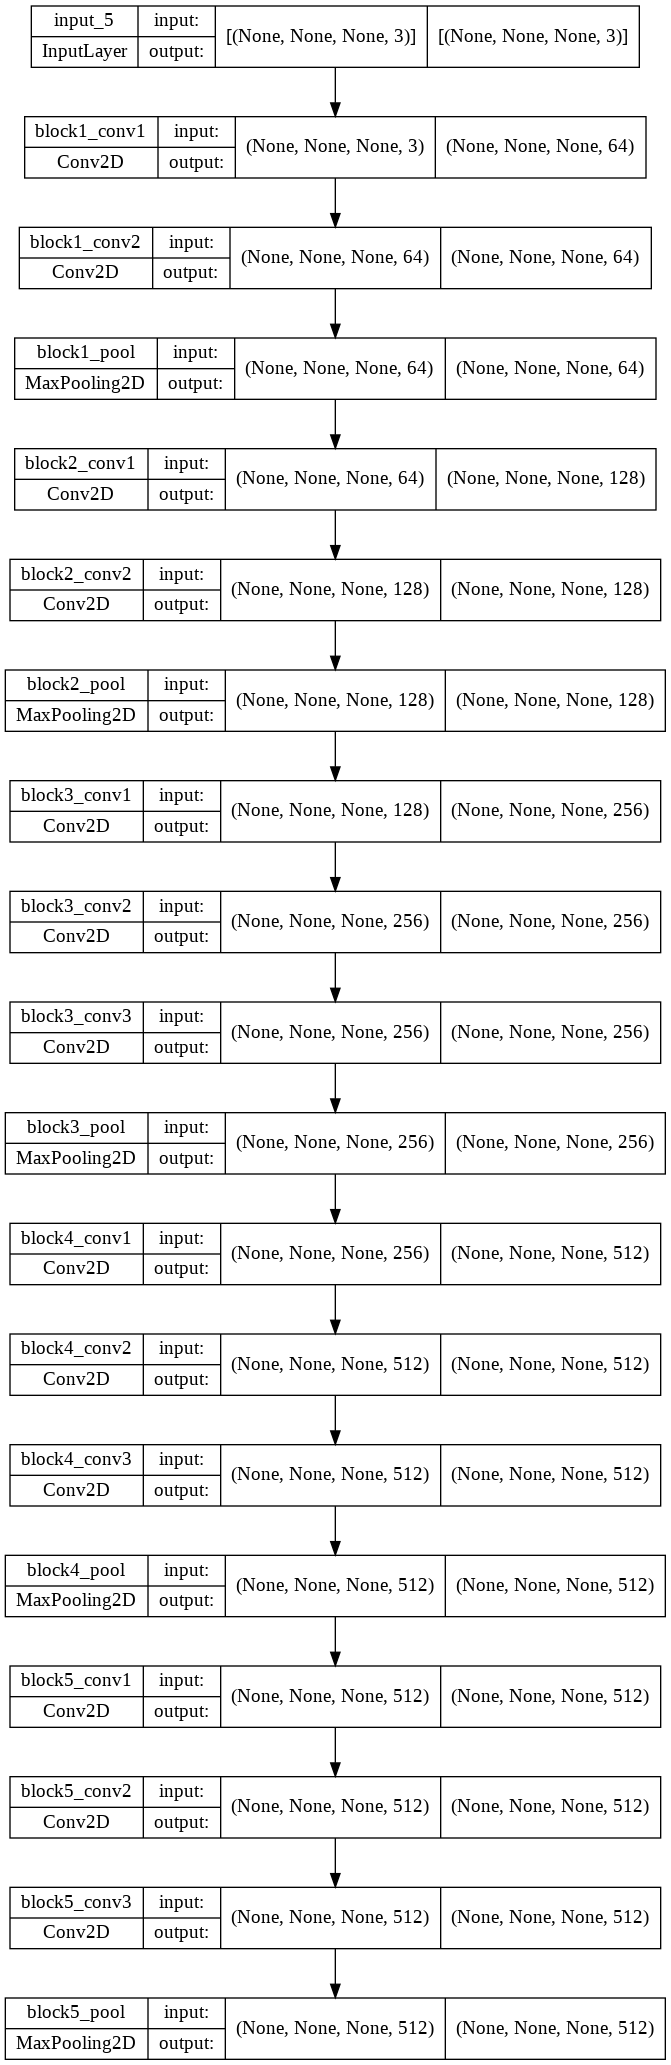

In [36]:
keras.utils.plot_model(model, "Project_Image_classification.png", show_shapes=True)

# Model Evaluation

# Predictions

In [37]:
test_digits = val_ds[0:10]
test_digits.shape

TypeError: ignored

In [44]:
from  keras.preprocessing.image import  load_img
from  keras.preprocessing.image import  img_to_array
from keras.applications.vgg16 import preprocess_input


# chargement et redimension
image = load_img('/content/images_dogs/Afghan_hound/n02088094_227.jpg' , target_size=(224, 224))

# convertir NumPy array
image = img_to_array(image)

# tensor rank 4 (#axis): samples, rows, columns, channels
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# Preparation  : soustraire la moyenne des pixels
image = preprocess_input(image)

In [45]:
from keras.applications.vgg16 import decode_predictions
# proba -> class label

proba = model.predict(image)
proba

array([[[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         ...,
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  8.644734 ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       , 25.485548 ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ]],

        [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       , 42.798634 ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       , 44.24125  ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         ...,
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       , 72.

In [43]:
label = decode_predictions(proba)

print("5 best :")
print(label)

ValueError: ignored

In [46]:
print("type = " ,  label[0][0][1])
print("proba = " ,  label[0][0][2])

NameError: ignored